##**Introduction**

In today’s digital marketplace, customers are exposed to a vast number of  product choices within a single category. Making an informed purchase decision can be challenging, especially when multiple products appear similar in terms of price and features. To support decision-making, customers often rely on ratings and written reviews shared by previous buyers who describe their experiences after using the product.
While numerical ratings provide a quick indication of product quality, textual reviews contain richer and more detailed feedback. However, manually reading and analysing thousands of customer reviews is time-consuming and impractical. This is where Natural Language Processing (NLP) plays a crucial role. NLP enables computers to understand, analyse, and extract meaningful insights from unstructured text data at scale.

In this project, we apply NLP and machine learning techniques to analyse Amazon product reviews from the musical instruments category. The objective is to automatically classify customer reviews into positive, neutral, and negative sentiments, uncover key themes using n-gram analysis and word clouds, and build a predictive sentiment classification model using TF-IDF vectorization. The insights derived from this analysis can help businesses understand customer perceptions, identify areas of improvement, and support data-driven decision-making.

**What is sentiment analysis?**

Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.It is quite hard for a human to go through each single line and identify the emotion being the user experience.Now with technology, we can automatically analyzing customer feedback, from survey responses to social media conversations, brands are able to listen attentively to their customers, and tailor products and services to meet their needs.

**Problem Statement**

Online shopping platforms host a large volume of customer reviews that reflect user experiences and opinions about products. While numerical ratings provide a quick overview of product performance, they do not fully capture the underlying customer sentiment expressed in written reviews. Manually analysing thousands of textual reviews to understand customer satisfaction, dissatisfaction, and recurring issues is time-consuming and inefficient.

The challenge is to automatically analyse and classify customer review text to determine sentiment in a scalable and accurate manner. Businesses need an efficient way to convert unstructured review data into actionable insights that can help them understand customer perceptions, identify areas for product improvement, and support data-driven decision-making.

This project addresses this problem by applying Natural Language Processing (NLP) and machine learning techniques to Amazon product reviews, with the goal of classifying reviews into positive, neutral, and negative sentiments, while also extracting meaningful patterns and trends from customer feedback.

##Import Libraries
Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [28]:
# ==========================
# Basic Libraries
# ==========================
import pandas as pd
import numpy as np
import re
import string
from collections import Counter, defaultdict

# ==========================
# NLTK & Text Processing
# ==========================
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

# ===============================
# Imports
# ===============================
from collections import defaultdict
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
from wordcloud import STOPWORDS

# ===============================
# Imports for Word Cloud
# ===============================
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# ==========================
# Machine Learning Libraries
# ==========================
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# ==========================
# Imbalanced Data Handling
# ==========================
from imblearn.over_sampling import SMOTE

# ==========================
# Visualization Libraries
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Interactive visualization (optional)
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

%matplotlib inline

# ==========================
# Ignore Warnings
# ==========================
import warnings
warnings.filterwarnings('ignore')
!pip install kaggle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##Importing the dataset

In [29]:
# Load the CSV file (replace 'Musical_instruments_reviews.csv' with your exact path if needed)
raw_reviews = pd.read_csv('Musical_instruments_reviews.csv')

# Check the shape of the dataset
print("✅ Dataset loaded successfully!")
print("Shape (rows, columns):", raw_reviews.shape)

# Show first 5 rows
print("\nFirst 5 rows:\n", raw_reviews.head())

# Check dataset info
print("\nDataset info:")
print(raw_reviews.info())

# Check for missing values
print("\nMissing values per column:\n", raw_reviews.isnull().sum())


✅ Dataset loaded successfully!
Shape (rows, columns): (10261, 9)

First 5 rows:
        reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  T

In [30]:
raw_reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


<a id="section-two"></a>
# Preprocessing and cleaning

We got to do lot of preprocessing before sending the reviews to the model. Let's go step by step.

## Handling NaN values

Let's check for null values

In [31]:
#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [32]:
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

In [33]:
process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [34]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


In [35]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [36]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [37]:
process_reviews['sentiment'].value_counts()

,count
sentiment,
Positive,9022
Neutral,772
Negative,467


In [38]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True)

# making separate date column from new data frame
process_reviews["date"]= new[0]

# making separate year column from new data frame
process_reviews["year"]= new[1]

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,sentiment,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,02 21,2014


In [39]:
# Splitting the date
new1 = process_reviews["date"].str.split(" ", n = 1, expand = True)

# adding month to the main dataset
process_reviews["month"]= new1[0]

# adding day to the main dataset
process_reviews["day"]= new1[1]

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [40]:
# Splitting the dataset based on comma and square bracket
new1 = process_reviews["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2)

#Attaching the results to a new column of the main dataframe
process_reviews['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
process_reviews=process_reviews.drop(['helpful'], axis=1)

In [41]:
process_reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21,0.00


In [42]:
process_reviews['helpful_rate'].value_counts()

,count
helpful_rate,
0.00,7215
1.00,2040
0.50,266
0.67,136
0.75,111
...,...
0.56,1
0.15,1
0.13,1


##Review text-Punctuation Cleaning

Let's begin our text processing by removing the punctuations

In [43]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['reviewerName','unixReviewTime'], axis=1)
#Creating a copy
clean_reviews=process_reviews.copy()

In [44]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [45]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

,reviewerID,asin,overall,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much to write about here but it does exact...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,the product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,the primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects my mxl mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,this pop filter is great it looks and performs...,Positive,2014,02,21,0.00


## Review text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [46]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [47]:
custom_stopwords = [
    "product", "amazon", "use", "used", "one", "also",
    "would", "get", "good", "like", "really", "well",
    "buy", "order"
]
stop_words = stop_words + custom_stopwords

In [48]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

,reviewerID,asin,overall,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,exactly quite affordablei not realized double ...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath otherwise prod...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs studio filter ...,Positive,2014,02,21,0.00


<a id="section-three"></a>
# Story Generation and Visualization from reviews
**In this section we will complete do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.**

**Prior analysis assumptions:**
* Higher the helpful rate the sentiment becomes positive
* There will be many negative sentiment reviews in the 2013 and 2014 year
* There will be more reviews at the starting of a month

**These assumptions will be verified with our plots also we will do text analysis alot.**

## Sentiments vs Helpful rate
**First lets look whether there any relationship between sentiment of review and helpfulness of it**

In [49]:
pd.DataFrame(process_reviews.groupby('sentiment')['helpful_rate'].mean())

,helpful_rate
sentiment,
Negative,0.307559
Neutral,0.275687
Positive,0.260505


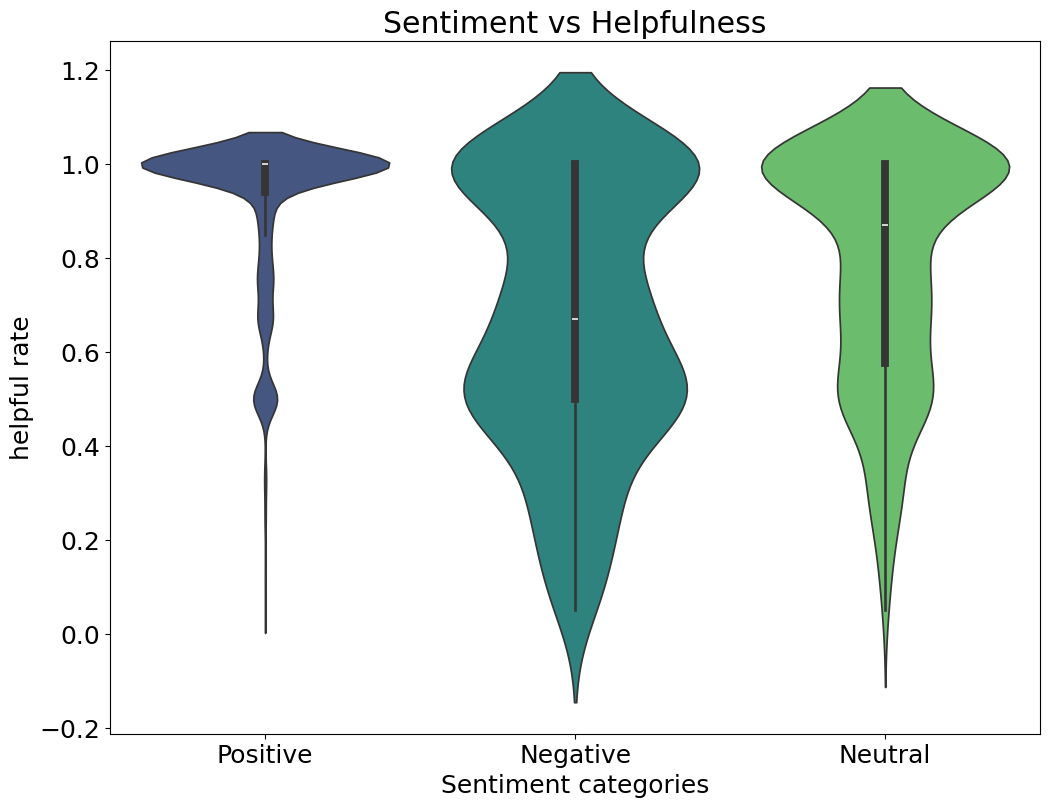

In [50]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] =12,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00]

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["helpful_rate"],palette='viridis')
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()

## Year vs Sentiment count
In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014

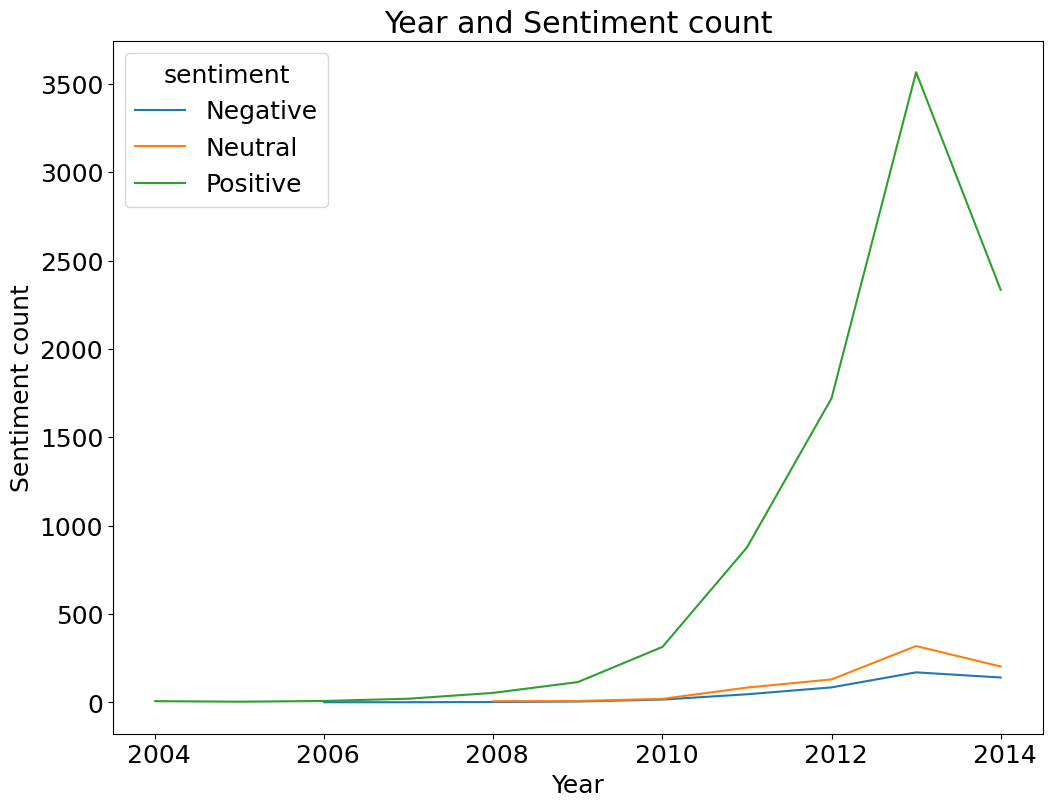

In [51]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

## Day of month vs Reviews count
Let's check if there are any relationship between reviews and day of month

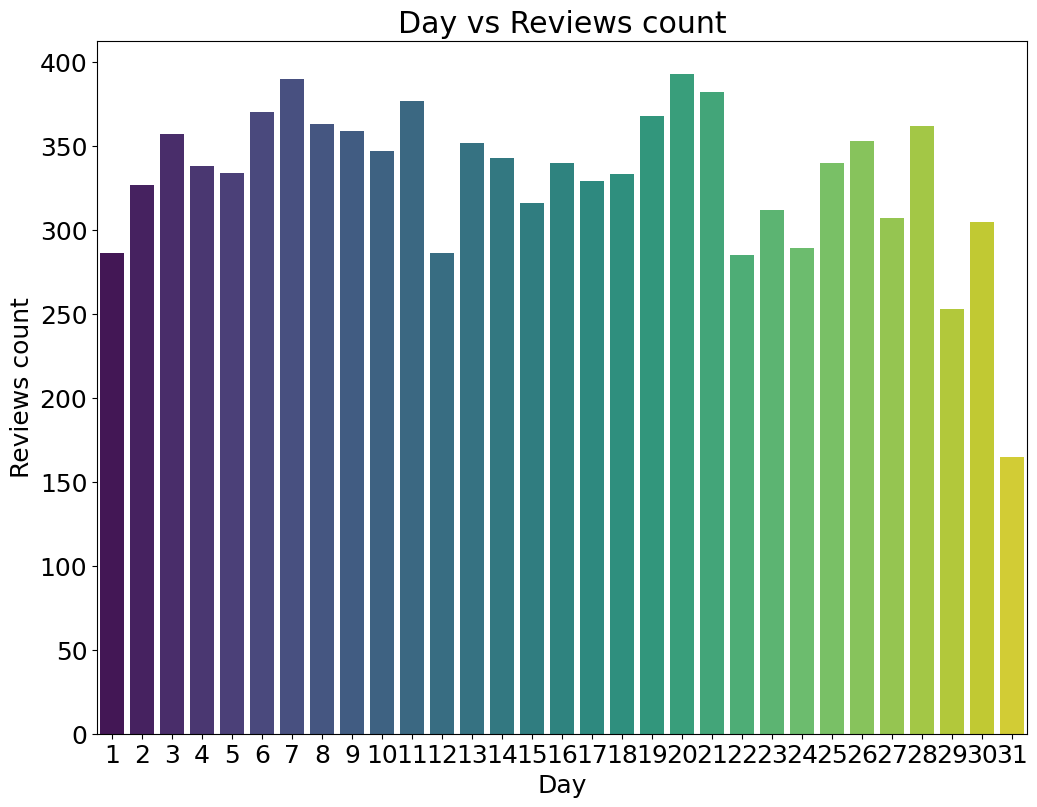

In [52]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day,palette='viridis')
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

## Creating few more features for text analysis
Now, let's create polarity, review length and word count**

**Polarity:** We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

**Review length:** length of the review which includes each letters and spaces

**Word length:** This measures how many words are there in review

In [53]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [54]:
process_reviews.head()

,reviewerID,asin,overall,reviews,sentiment,year,month,day,helpful_rate,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00,0.250000,142,21
1,A14VAT5EAX3D9S,1384719342,5.0,exactly quite affordablei not realized double ...,Positive,2013,03,16,0.93,0.014286,317,48
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath otherwise prod...,Positive,2013,08,28,1.00,0.167500,304,46
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00,0.333333,169,22
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs studio filter ...,Positive,2014,02,21,0.00,0.800000,131,20


In [55]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Sentiment polarity distribution
Let's look at our polarity distribution

In [56]:
process_reviews['polarity'] = process_reviews['polarity'].astype(float)


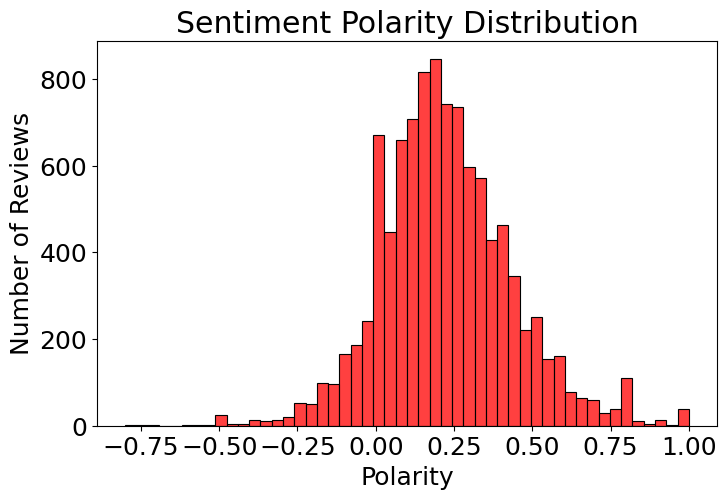

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(process_reviews['polarity'], bins=50, kde=False, color='Red')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.show()


## Review Rating Distribution
Let's check out how overall ratings are distributed

In [58]:
rating_counts = process_reviews['overall'].value_counts().sort_index()
rating_percent = process_reviews['overall'].value_counts(normalize=True).sort_index() * 100

print("✅ Review Rating Counts:\n", rating_counts)
print("\n✅ Review Rating Percentages:\n", rating_percent.round(2))


✅ Review Rating Counts:
 overall
1.0     217
2.0     250
3.0     772
4.0    2084
5.0    6938
Name: count, dtype: int64

✅ Review Rating Percentages:
 overall
1.0     2.11
2.0     2.44
3.0     7.52
4.0    20.31
5.0    67.62
Name: proportion, dtype: float64


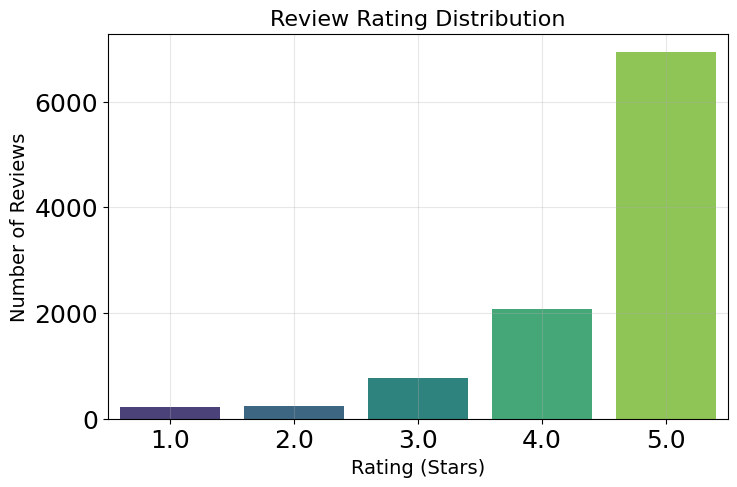

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Review Rating Distribution', fontsize=16)
plt.xlabel('Rating (Stars)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


## Review Text Length Distribution
Let's check out the length of review text

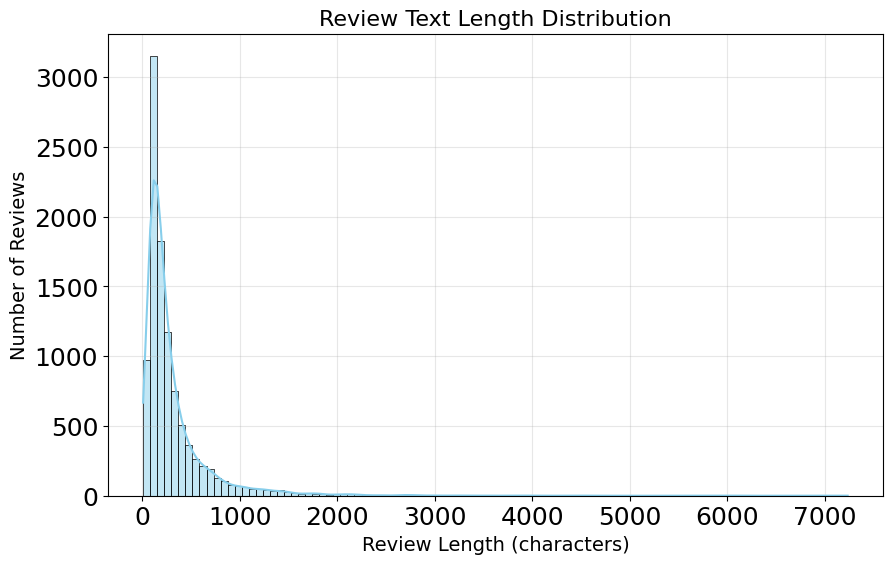

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(process_reviews['review_len'], bins=100, color='skyblue', kde=True)
plt.title('Review Text Length Distribution', fontsize=16)
plt.xlabel('Review Length (characters)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


## Review Text Word Count Distribution
Let's check out the word count of review text

In [61]:
print("✅ Review Word Count Statistics:")
print(process_reviews['word_count'].describe().round(2))


✅ Review Word Count Statistics:
count    10261.00
mean        46.44
std         56.06
min          1.00
25%         17.00
50%         28.00
75%         53.00
max       1072.00
Name: word_count, dtype: float64


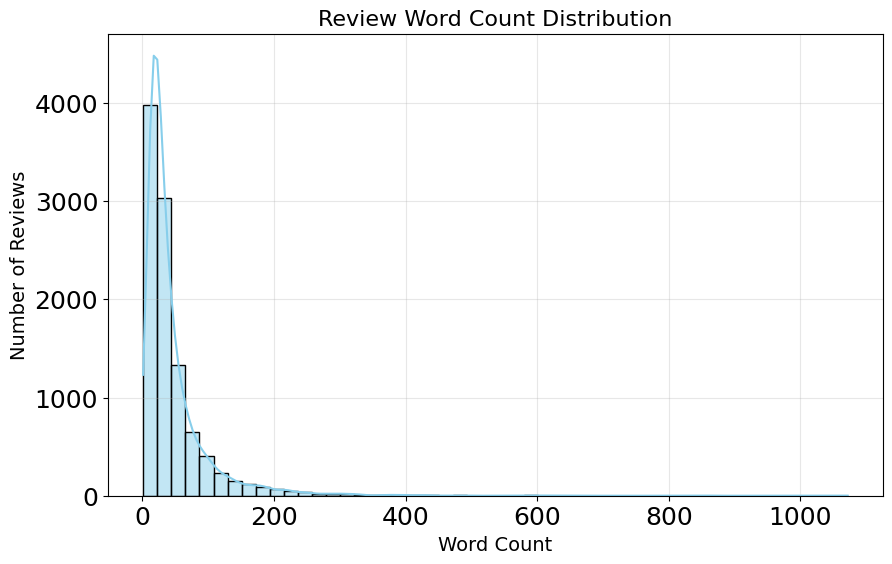

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(process_reviews['word_count'], bins=50, color='skyblue', kde=True)
plt.title('Review Word Count Distribution', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


##**N-gram analysis**
Welcome to the deep text analysis. Here we will be using ngrams to analyse the text, based on it's sentiment

**Monogram analysis**

Here we will plot most frequent one word in reviews based on sentiments

In [63]:
# Force Colab/Notebook to display Plotly figures
pio.renderers.default = "colab"  # or "notebook" for Jupyter
# pio.renderers.default = "notebook"  # Uncomment if using Jupyter

# ===============================
# Custom Stopwords
# ===============================
stop_words = set(STOPWORDS)

custom_stopwords = [
    'product','amazon','use','used','one','also','would','get','good','like',
    'really','well','buy','order','if','but','will','ive','im','little','even',
    'much','does','dont','no','not','work','works','amp'
]

stop_words = stop_words.union(custom_stopwords)

# ===============================
# N-gram Generation Function
# ===============================
def generate_ngrams(text, n_gram=1):
    tokens = [t for t in text.lower().split() if t not in stop_words and t != ""]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# ===============================
# Get Top Words Function
# ===============================
def get_top_words(reviews, top_n=20):
    freq_dict = defaultdict(int)
    for text in reviews:
        for word in generate_ngrams(text):
            freq_dict[word] += 1
    sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_freq[:top_n], columns=['word','wordcount'])

# ===============================
# Bar Chart Trace Function
# ===============================
def create_bar_trace(df, color):
    return go.Bar(
        x=df['wordcount'][::-1],
        y=df['word'][::-1],
        orientation='h',
        marker=dict(color=color),
        showlegend=False
    )

# ===============================
# Split Reviews by Sentiment
# ===============================
review_pos = process_reviews[process_reviews['sentiment']=='Positive']['reviews']
review_neu = process_reviews[process_reviews['sentiment']=='Neutral']['reviews']
review_neg = process_reviews[process_reviews['sentiment']=='Negative']['reviews']

# ===============================
# Generate Top Words
# ===============================
trace_pos = create_bar_trace(get_top_words(review_pos), 'green')
trace_neu = create_bar_trace(get_top_words(review_neu), 'grey')
trace_neg = create_bar_trace(get_top_words(review_neg), 'red')

# ===============================
# Create Subplots
# ===============================
fig = make_subplots(
    rows=3, cols=1,
    vertical_spacing=0.05,
    subplot_titles=['Positive Reviews', 'Neutral Reviews', 'Negative Reviews']
)

fig.add_trace(trace_pos, row=1, col=1)
fig.add_trace(trace_neu, row=2, col=1)
fig.add_trace(trace_neg, row=3, col=1)

fig.update_layout(
    height=1200, width=900,
    title_text='Top Words by Sentiment',
    paper_bgcolor='rgb(233,233,233)',
    font=dict(size=14)
)

# ===============================
# Show Figure
# ===============================
fig.show()


## Bigram analysis
Here we will plot most frequent two words in reviews based on sentiments

In [64]:
# ===============================
# Function to get top n-grams
# ===============================
def get_top_ngrams(reviews, n_gram=2, top_n=20):
    freq_dict = defaultdict(int)
    for text in reviews:
        for ngram in generate_ngrams(text, n_gram=n_gram):
            freq_dict[ngram] += 1
    sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_freq[:top_n], columns=['ngram','count'])

# ===============================
# Generate Top Bigrams
# ===============================
top_bigrams_pos = get_top_ngrams(review_pos, n_gram=2)
top_bigrams_neu = get_top_ngrams(review_neu, n_gram=2)
top_bigrams_neg = get_top_ngrams(review_neg, n_gram=2)

# ===============================
# Bar Charts for Bigrams
# ===============================
def create_bar_ngram(df, color):
    return go.Bar(
        x=df['count'][::-1],
        y=df.iloc[::-1]['ngram'],
        orientation='h',
        marker=dict(color=color),
        showlegend=False
    )

trace_bi_pos = create_bar_ngram(top_bigrams_pos, 'green')
trace_bi_neu = create_bar_ngram(top_bigrams_neu, 'grey')
trace_bi_neg = create_bar_ngram(top_bigrams_neg, 'red')

fig_bi = make_subplots(
    rows=3, cols=1,
    vertical_spacing=0.05,
    subplot_titles=['Positive Reviews - Bigrams', 'Neutral Reviews - Bigrams', 'Negative Reviews - Bigrams']
)

fig_bi.add_trace(trace_bi_pos, 1, 1)
fig_bi.add_trace(trace_bi_neu, 2, 1)
fig_bi.add_trace(trace_bi_neg, 3, 1)

fig_bi.update_layout(height=1200, width=900, title_text='Top Bigrams by Sentiment', paper_bgcolor='rgb(233,233,233)')
fig_bi.show()


## Trigram analysis
Here we will plot most frequent three words in reviews based on sentiments

In [65]:
# ===============================
# Generate Top Trigrams
# ===============================
top_trigrams_pos = get_top_ngrams(review_pos, n_gram=3)
top_trigrams_neu = get_top_ngrams(review_neu, n_gram=3)
top_trigrams_neg = get_top_ngrams(review_neg, n_gram=3)

# ===============================
# Bar Charts for Trigrams
# ===============================
trace_tri_pos = create_bar_ngram(top_trigrams_pos, 'green')
trace_tri_neu = create_bar_ngram(top_trigrams_neu, 'grey')
trace_tri_neg = create_bar_ngram(top_trigrams_neg, 'red')

fig_tri = make_subplots(
    rows=3, cols=1,
    vertical_spacing=0.05,
    subplot_titles=['Positive Reviews - Trigrams', 'Neutral Reviews - Trigrams', 'Negative Reviews - Trigrams']
)

fig_tri.add_trace(trace_tri_pos, 1, 1)
fig_tri.add_trace(trace_tri_neu, 2, 1)
fig_tri.add_trace(trace_tri_neg, 3, 1)

fig_tri.update_layout(height=1200, width=900, title_text='Top Trigrams by Sentiment', paper_bgcolor='rgb(233,233,233)')
fig_tri.show()


## Wordcloud-Positive reviews

Let's look at the word cloud of positive reviews

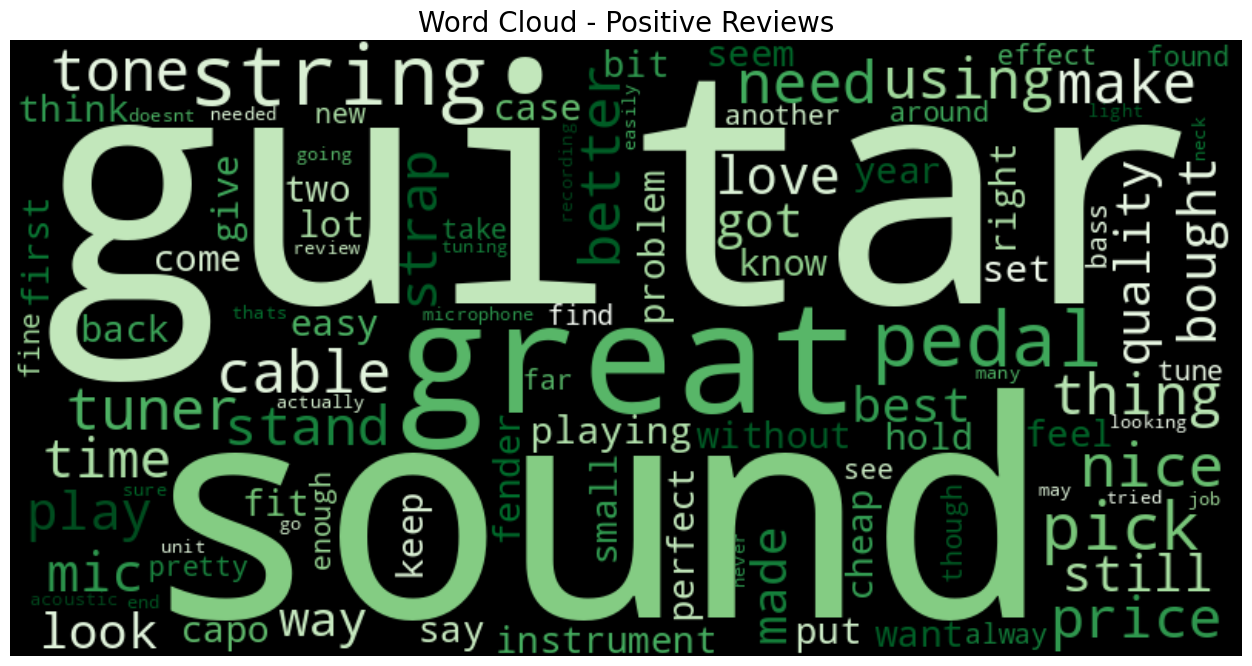

In [66]:
# Combine all positive reviews into one string
text_pos = " ".join(review_pos)

# Create WordCloud object
wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=stop_words,
    max_words=100,
    colormap='Greens'
).generate(text_pos)

# Plot the Word Cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews', fontsize=20)
plt.show()


We can see positive words like great, quality, nice,love,better etc.,

## Wordcloud-Neutral reviews

Let's look at the word cloud of neutral reviews

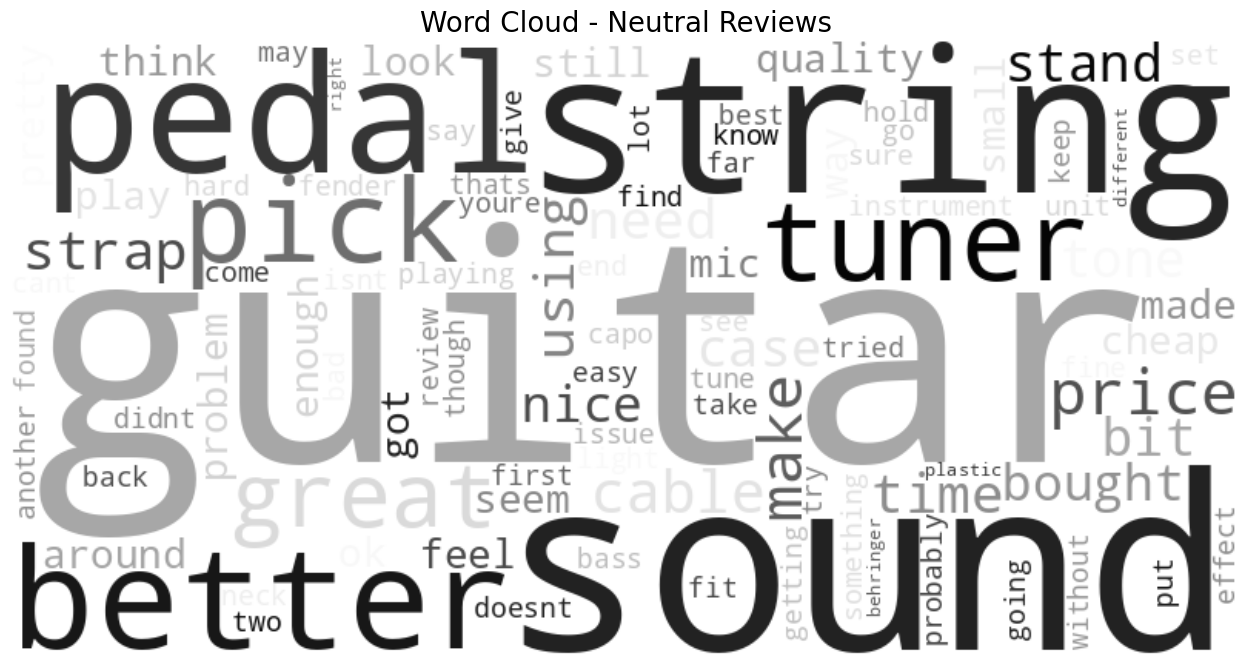

In [67]:
# ===============================
# Combine all Neutral reviews into one string
# ===============================
text_neu = " ".join(review_neu)

# ===============================
# Create WordCloud object for Neutral reviews
# ===============================
wordcloud_neu = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    colormap='Greys'  # Neutral color
).generate(text_neu)

# ===============================
# Plot the Word Cloud
# ===============================
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Neutral Reviews', fontsize=20)
plt.show()


Most of the neutral review words are focussed on the products and how can they be improved.

## Wordcloud-Negative reviews

Let's look at the word cloud of negative reviews

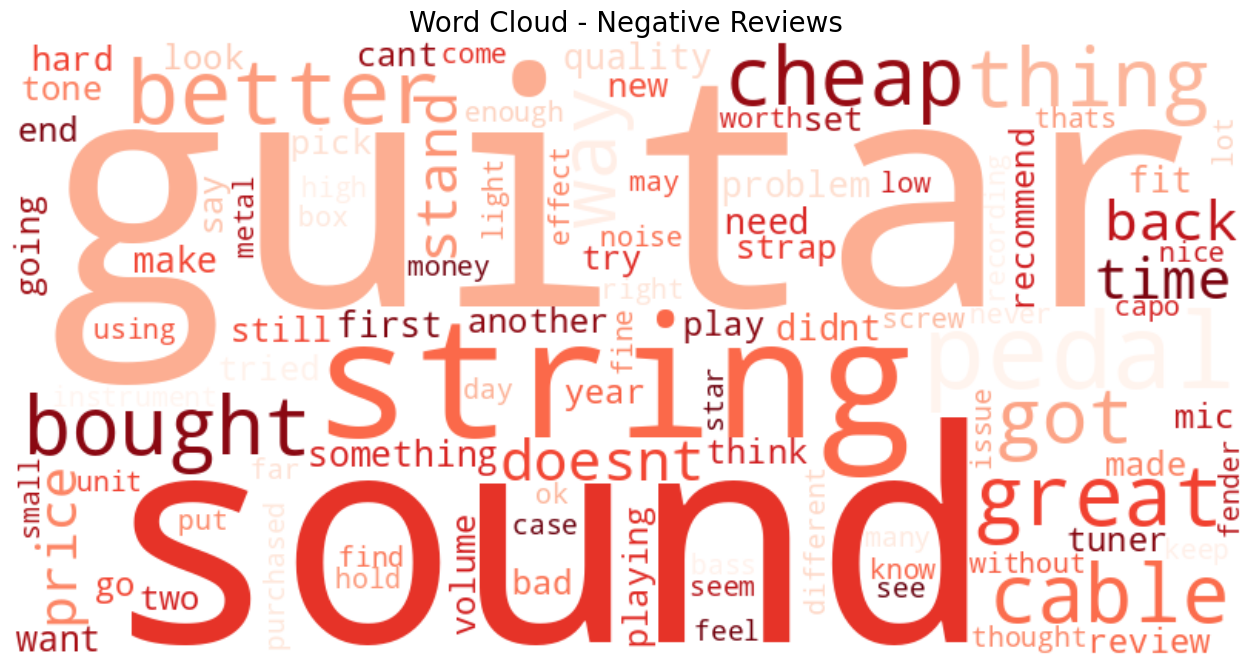

In [68]:
# ===============================
# Combine all Negative reviews into one string
# ===============================
text = " ".join(review_neg)

# ===============================
# Create WordCloud object for Negative reviews
# ===============================
wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    colormap='Reds'  # Negative color
).generate(text)

# ===============================
# Plot the Word Cloud
# ===============================
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews', fontsize=20)
plt.show()


We can see negative review words such as doesnt,didnt,cheap,noise,bad,problems,issue,hard,etc.,

<a id="section-four"></a>
# Extracting Features from Cleaned reviews
Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

## Encoding target variable-sentiment
Let's encode our target variable with Label encoder.

In [69]:
label_encoder = LabelEncoder()
process_reviews['sentiment_encoded'] = label_encoder.fit_transform(process_reviews['sentiment'])

process_reviews['sentiment_encoded'].value_counts()


,count
sentiment_encoded,
2,9022
1,772
0,467


In [70]:
review_features = process_reviews[['reviews']].copy().reset_index(drop=True)

In [71]:
ps = PorterStemmer()
corpus = []

for review in review_features['reviews']:
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    corpus.append(' '.join(review))

In [72]:
review_features.head()

,reviews
0,not much write but exactly supposed filters po...
1,exactly quite affordablei not realized double ...
2,primary job device block breath otherwise prod...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs studio filter ...


## TFIDF(Term Frequency — Inverse Document Frequency)
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [73]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.8
)

X = tfidf_vectorizer.fit_transform(corpus)
X.shape


(10261, 5000)

In [74]:
y = process_reviews['sentiment_encoded']

## Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them. <br>

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [75]:
print("Original dataset shape:", Counter(y))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Resampled dataset shape:", Counter(y_res))

Original dataset shape: Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape: Counter({2: 9022, 1: 9022, 0: 9022})


## Train-test split(75:25)
Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.25,
    random_state=42,
    stratify=y_res
)

<a id="section-five"></a>
# Model Building: Sentiment Analysis
As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model selection

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [78]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i, model in enumerate(cv_models):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    print(f"{cv_dict[i]} CV Accuracy: {score:.4f}")

Logistic Regression CV Accuracy: 0.9348
Decision Tree CV Accuracy: 0.8802
KNN CV Accuracy: 0.8666
SVC CV Accuracy: 0.9860
Naive Bayes CV Accuracy: 0.7188


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 70%. That's great. So let's go with logistic regression with hyperparameter tuning.

## Logistic Regression with Hyperparameter tuning
We use regularization parameter and penality for parameter tuning. let's see which one to plug.

In [79]:
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(
    LogisticRegression(solver='liblinear', random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Model:", best_model)

Best Model: LogisticRegression(C=np.float64(10000.0), random_state=0, solver='liblinear')


In [80]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"Test Accuracy: {best_model.score(X_test, y_test):.2f}")

Test Accuracy: 0.97


We have got 97% accuracy. That ain't bad. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy

## Classification metrics
Here we plot the confusion matrix with ROC and check our f1 score

Confusion matrix, without normalization


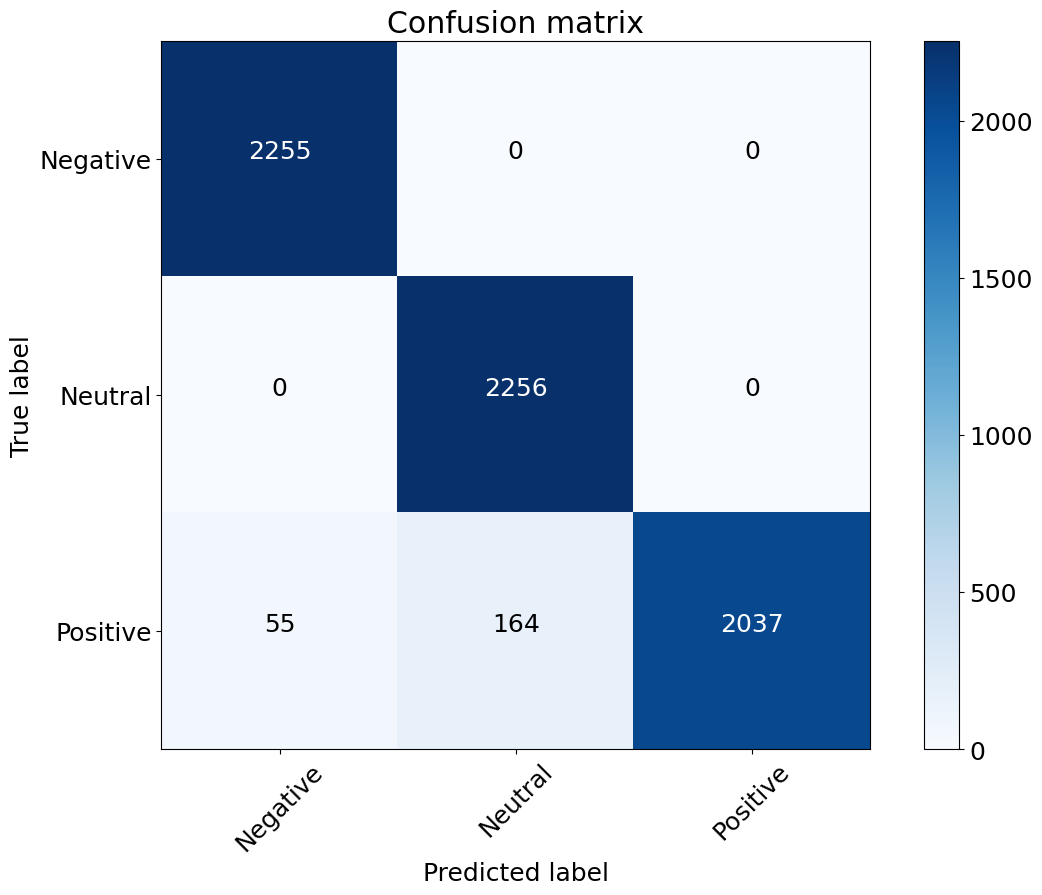

In [81]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'])

In [82]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2255
           1       0.93      1.00      0.96      2256
           2       1.00      0.90      0.95      2256

    accuracy                           0.97      6767
   macro avg       0.97      0.97      0.97      6767
weighted avg       0.97      0.97      0.97      6767



Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified

## **ROC-AUC curve**
This is a very important curve where we decide on which threshold to setup based upon the objective criteria.
Here we plotted ROC for different classes which can help us understand which class was classified better.
Also we plot micro and macro averages on the roc curve.

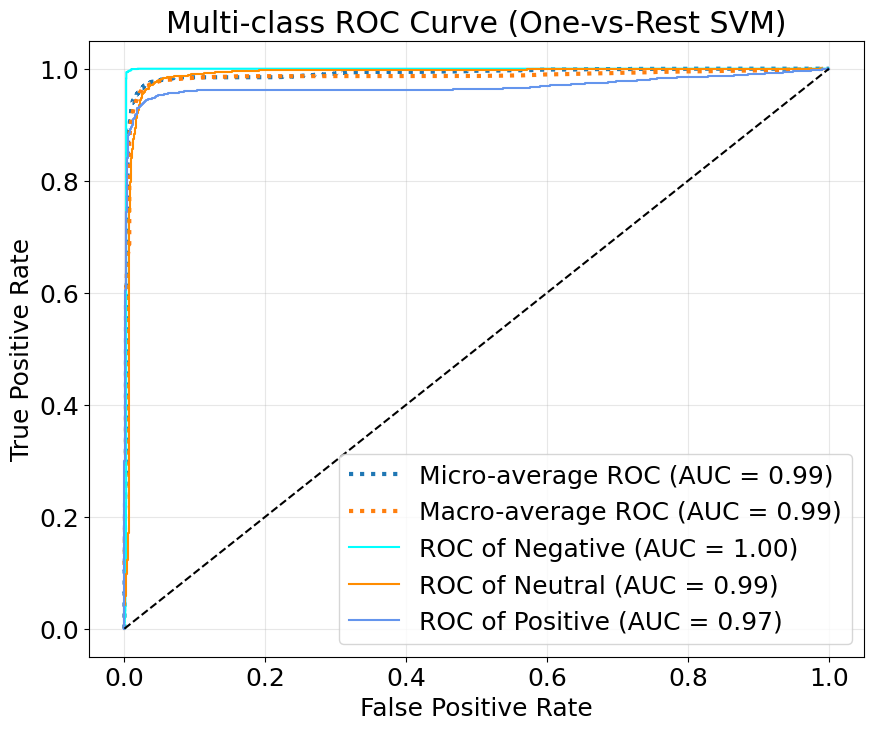

In [83]:
# Use SMOTE-resampled data
y_bin = label_binarize(y_res, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Stratified split to keep all classes
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_bin, test_size=0.2, random_state=0, stratify=y_bin
)

# One-vs-Rest SVM
classifier = OneVsRestClassifier(
    SVC(kernel='linear', probability=True, random_state=10)
)

# Use predict_proba (more stable than decision_function)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# ROC computation
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(
    y_test.ravel(), y_score.ravel()
)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(10, 8))

plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average ROC (AUC = {roc_auc['micro']:.2f})",
         linestyle=':', linewidth=3)

plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average ROC (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', linewidth=3)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
labels = ['Negative', 'Neutral', 'Positive']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC of {labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (One-vs-Rest SVM)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


**ROC–AUC Insight:**

The ROC curves show excellent class separation with a micro and macro AUC of 0.99, indicating strong overall model performance. Negative reviews are perfectly identified (AUC = 1.00), while Neutral (0.99) and Positive (0.97) sentiments are also classified with high reliability. This confirms the robustness of the sentiment model across all classes.

## **Conclusion**
In this project, customer reviews from Amazon musical instrument products were analyzed to extract meaningful business insights using Natural Language Processing and Machine Learning techniques. The raw text data was cleaned, preprocessed, and transformed into numerical representations using the TF-IDF vectorization method. Exploratory analysis, sentiment distribution, n-gram analysis, and word cloud visualizations helped uncover key themes and customer perceptions across positive, neutral, and negative reviews.

Several machine learning models were evaluated for sentiment classification, including Logistic Regression, Decision Tree, KNN, Naive Bayes, and Support Vector Machines. After handling class imbalance using SMOTE, the optimized Logistic Regression and One-vs-Rest SVM models demonstrated excellent performance. The final model achieved high accuracy (97%) and strong class-wise precision and recall. Additionally, the ROC-AUC scores (up to 0.99) confirmed the model’s strong ability to distinguish between sentiment categories.

From a business perspective, this analysis enables organizations to identify customer dissatisfaction, monitor sentiment trends over time, and prioritize actionable feedback. The approach can be scaled to support product improvement, customer experience analysis, and decision-making in real-world business environments. Overall, this project demonstrates the effective application of data science techniques to solve a practical business problem using unstructured text data.